In [35]:
n_scenarios = pow(2, 10) # Ideally a power of 2 > 1000 ... 2^10 = 1024
policies = 1
pf_id = 2

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
from ema_workbench.util import ema_logging
from problem_formulation import get_model_for_problem_formulation
from ema_workbench import Policy

ema_logging.log_to_stderr(ema_logging.INFO)

dike_model, planning_steps = get_model_for_problem_formulation(pf_id) #changes for each file

In [38]:
import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)
levers = copy.deepcopy(dike_model.levers)

In [ ]:
from ema_workbench import (ema_logging, MultiprocessingEvaluator, Samplers)
ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenarios, policies=policies, uncertainty_sampling=Samplers.SOBOL)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 40960 scenarios * 1 policies * 1 model(s) = 40960 experiments








  0%|                                                | 0/40960 [00:00<?, ?it/s]







  0%|                                    | 1/40960 [00:10<115:18:34, 10.13s/it]







  0%|                                     | 5/40960 [00:17<34:39:29,  3.05s/it]







  0%|                                     | 9/40960 [00:22<24:19:03,  2.14s/it]

In [6]:
experiments, outcomes = results

In [10]:
from ema_workbench import save_results

save_results(results, './output/open_exploration/Matvei_Open_Exploration_policies_id_%s.tar.gz' % pf_id)
experiments.to_csv('./output/open_exploration/Matvei_Open_Exploration_policies_id_%s_exp.csv' % pf_id, index=False)
pd.DataFrame.from_dict(outcomes).to_csv('./output/open_exploration/Matvei_Open_Exploration_policies_id_%s_out.csv' % pf_id, index=False)

[MainProcess/INFO] results saved successfully to C:\Users\python\Documents\GitHub\MBDM\final assignment\output\open_exploration\Open_Exploration_policies_id_2.tar.gz


In [16]:
outcomes

{'Expected Annual Damage': array([     0.        ,      0.        ,      0.        , ...,
        864785.02164951, 864785.02164951, 864785.02164951]),
 'Dike Investment Costs': array([8.47412731e+08, 8.47412731e+08, 8.47412731e+08, ...,
        5.23725548e+08, 5.23725548e+08, 5.23725548e+08]),
 'RfR Investment Costs': array([1.292e+09, 1.292e+09, 1.292e+09, ..., 6.542e+08, 6.542e+08,
        6.542e+08]),
 'Evacuation Costs': array([ 0.        ,  0.        ,  0.        , ..., 40.72778052,
        40.72778052, 40.72778052]),
 'Expected Number of Deaths': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.60936574e-05, 7.60936574e-05, 7.60936574e-05])}

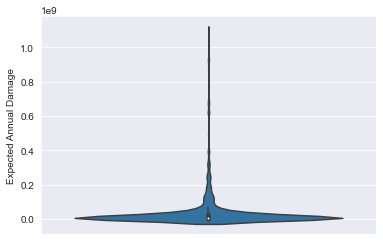

In [11]:
import pandas as pd
import seaborn as sns
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
sns.violinplot(data=data, y='Expected Annual Damage')
plt.show()

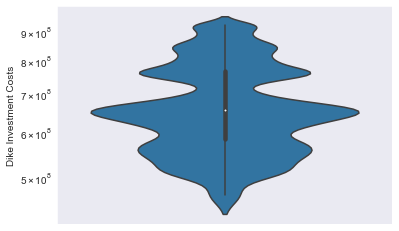

In [12]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='Dike Investment Costs')
ax.set_yscale('log')
plt.show()

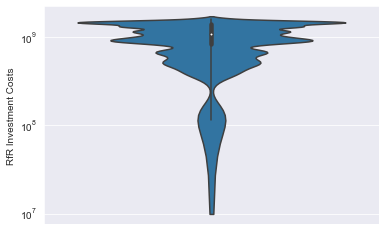

In [13]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='RfR Investment Costs')
ax.set_yscale('log')
plt.show()

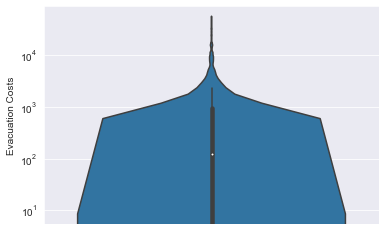

In [14]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='Evacuation Costs')
ax.set_yscale('log')
plt.show()

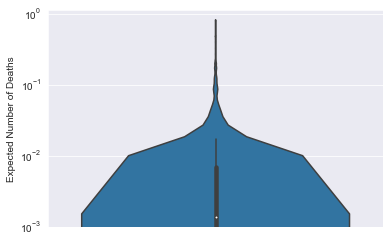

In [15]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='Expected Number of Deaths')
ax.set_yscale('log')
plt.show()